In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import functions
import objects
from types import SimpleNamespace
#import syntheticData
from matplotlib import cm
import ast
import pickle
import matplotlib

In [1]:
#Define function that establishes form of diffusion coefficient through space
def diffusion(point):

    xterm1 = np.exp(-((point[0] - 0)**2)/(2*40**2))
    yterm1 = np.exp(-((point[1] - 0)**2)/(2*40**2))
    xterm2 = np.exp(-((point[0] - 200)**2)/(2*40**2))
    yterm2 = np.exp(-((point[1] - 0)**2)/(2*40**2))
    xterm3 = np.exp(-((point[0] - 200)**2)/(2*40**2))
    yterm3 = np.exp(-((point[1] - 200)**2)/(2*40**2))
    xterm4 = np.exp(-((point[0] - 0)**2)/(2*40**2))
    yterm4 = np.exp(-((point[1] - 200)**2)/(2*40**2))
    xterm5 = np.exp(-((point[0] - 100)**2)/(2*25**2))
    yterm5 = np.exp(-((point[1] - 100)**2)/(2*25**2))
    value = 1 + 5*xterm1*yterm1 + 4*xterm2*yterm2 + 7*xterm3*yterm3 + 3*xterm4*yterm4 + 4*xterm5*yterm5
    return value

In [3]:
file = open("C:/Users/vkuma/Research/LearningDiffusionMaps/100 1 40variables.pkl", "rb")
variables = pickle.load(file)
file = open("C:/Users/vkuma/Research/LearningDiffusionMaps/100 1 40data.pkl", "rb")
data = pickle.load(file)
variables.dInduPrior

2.8349546312664184

In [4]:
'''
#read datafile
file = open("C:/Users/vkuma/Research/LearningDiffusionMaps/LargeDatasets/syntheticData/test2/syntheticData.csv")
fullArray = np.loadtxt(file,delimiter = ",")

#coordinates for trajectories
x = fullArray[:,1]
y = fullArray[:,2]
# Initialize variables
data = SimpleNamespace(**objects.DATA)
data.trajectoriesIndex = fullArray[:,0]
data.trajectories = np.vstack((x,y)).T
data.deltaT = 1
data.nData = len(data.trajectoriesIndex)
data.nTrajectories = np.unique(data.trajectoriesIndex)

variables = functions.initialization(objects.PARAMETERS, data, 1, 10)
pVect = []
with open('C:/Users/vkuma/Research/LearningDiffusionMaps/LargeDatasets/syntheticData/test2/300000probability(1 10).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/LearningDiffusionMaps/LargeDatasets/syntheticData/test2/300000samples(1 10).csv')
dVect = np.loadtxt(file,delimiter = ",")
'''

'\n#read datafile\nfile = open("C:/Users/vkuma/Research/LearningDiffusionMaps/LargeDatasets/syntheticData/test2/syntheticData.csv")\nfullArray = np.loadtxt(file,delimiter = ",")\n\n#coordinates for trajectories\nx = fullArray[:,1]\ny = fullArray[:,2]\n# Initialize variables\ndata = SimpleNamespace(**objects.DATA)\ndata.trajectoriesIndex = fullArray[:,0]\ndata.trajectories = np.vstack((x,y)).T\ndata.deltaT = 1\ndata.nData = len(data.trajectoriesIndex)\ndata.nTrajectories = np.unique(data.trajectoriesIndex)\n\nvariables = functions.initialization(objects.PARAMETERS, data, 1, 10)\npVect = []\nwith open(\'C:/Users/vkuma/Research/LearningDiffusionMaps/LargeDatasets/syntheticData/test2/300000probability(1 10).csv\') as file_obj:\n      \n    # Create reader object by passing the file \n    # object to reader method\n    reader_obj = csv.reader(file_obj)\n      \n    # Iterate over each row in the csv \n    # file using reader object\n    for row in reader_obj:\n        pVect.append(float(row

In [5]:
pVect = []
with open("C:/Users/vkuma/Research/LearningDiffusionMaps/100probability(1 40).csv") as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open("C:/Users/vkuma/Research/LearningDiffusionMaps/100samples(1 40).csv")
dVect = np.loadtxt(file,delimiter = ",")
np.shape(dVect)

(101, 2500)

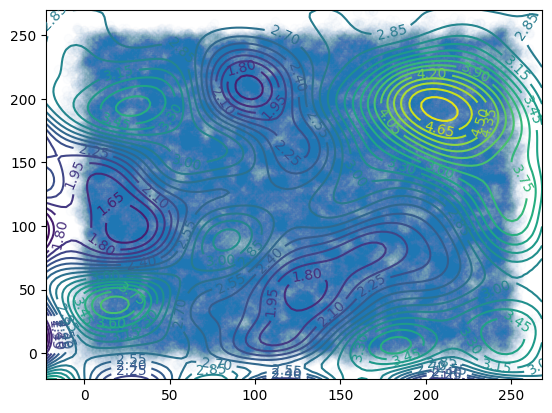

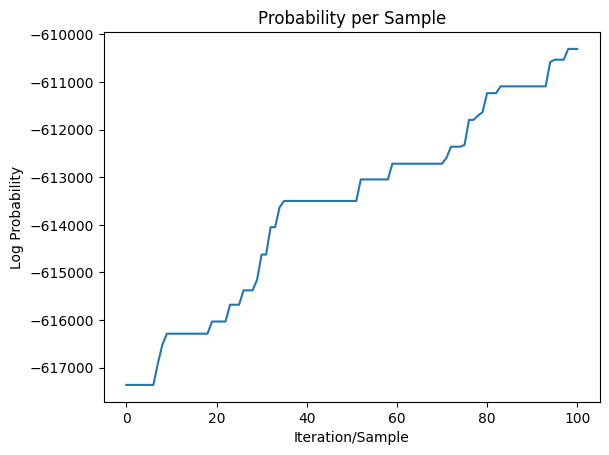

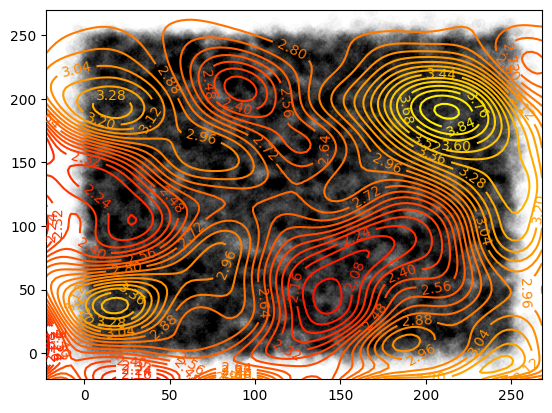

In [6]:
#plot6 = syntheticData.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot4 = functions.meanPlot(variables, dVect, data)


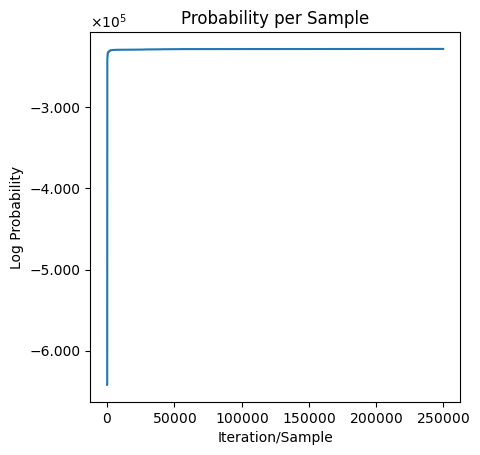

In [7]:
#generate plot
fig, ax = plt.subplots(1, 1)
plt.plot(pVect)
plt.title("Probability per Sample")
plt.xlabel("Iteration/Sample")
plt.ylabel("Log Probability")
plt.ticklabel_format(useMathText=True)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "%1.3f"
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

In [9]:
from matplotlib import ticker

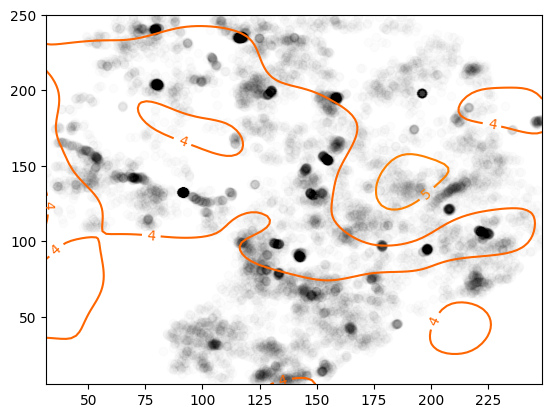

In [9]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect, 0)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX, shapedY, shapedMap, levels = [0, 1,2,3,4,5,6,7,8,9,10], cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0], trajectories[:,1], alpha = 0.01, c = "black")

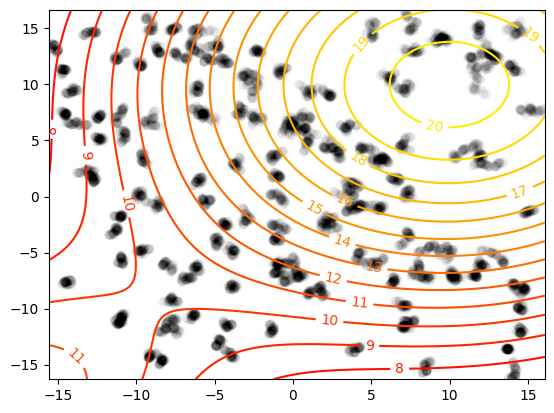

In [ ]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = diffusion(fineCoordinates.T)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX, shapedY, shapedMap, levels = 15, cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0], trajectories[:,1], alpha = 0.01, c = "black")

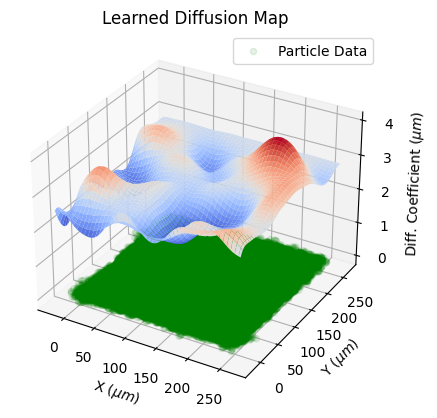

In [47]:
plot5 = functions.plotThreeD(variables, dVect, data)

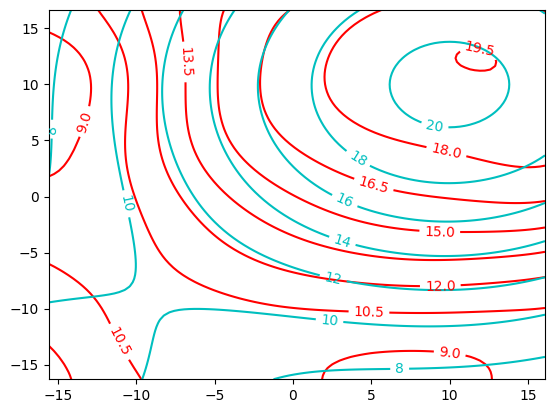

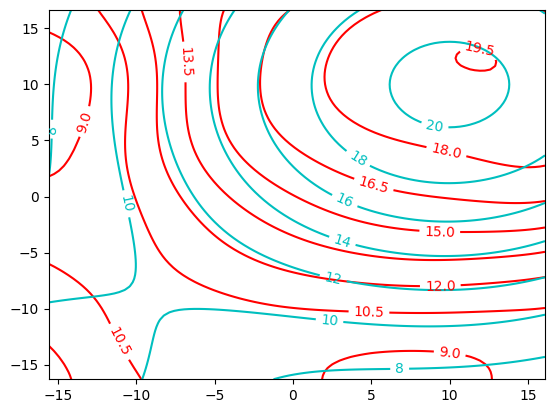

In [ ]:
syntheticData.plots(variables, dVect, pVect)

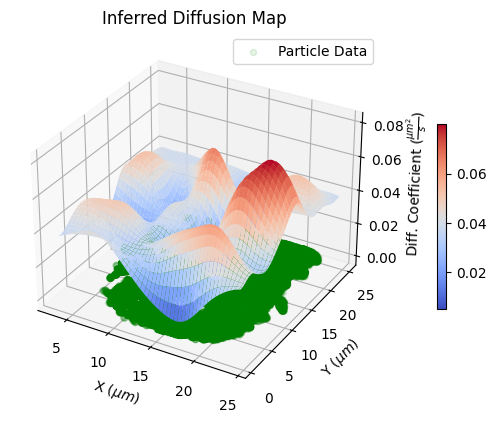

In [15]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = (cInduFine.T @ (cInduInduInv @ np.mean(dVect, 0)))/100

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)




#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX/10, shapedY/10, shapedMap, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0]/10, trajectories[:,1]/10, 0, color = "green", alpha = 0.1, label = "Particle Data")
#fig.scatter3D(induCoordinates[:,0], induCoordinates[:,1], 0, color = "black", alpha = 0.5, label = "Inducing Points")
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Inferred Diffusion Map")
ticks = np.arange(0, 10/100, 2/100)
fig.legend()
fig.set_zticks(ticks)
norm = matplotlib.colors.Normalize(vmin=np.min(shapedMap), vmax=np.max(shapedMap))
m = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
m.set_array([])
plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5))

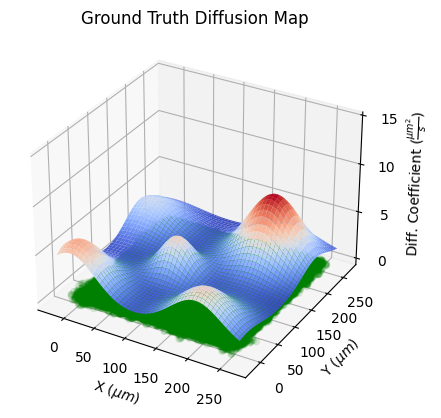

In [8]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples

unshapedMap = diffusion(fineCoordinates.T)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX, shapedY, shapedMap, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0], trajectories[:,1], 0, color = "green", alpha = 0.1, label = "Particle Data")
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Ground Truth Diffusion Map")
ticks = np.arange(0, 20, 5)
fig.set_zticks(ticks)

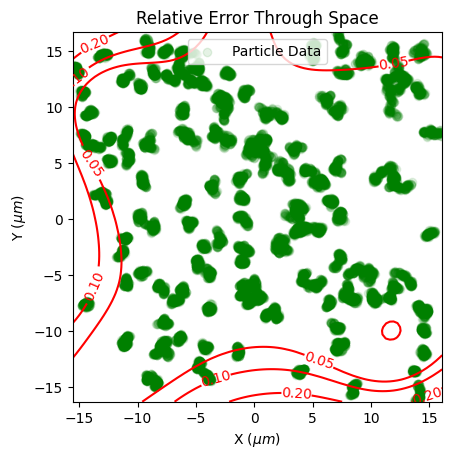

In [ ]:
from cProfile import label


nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

groundTruth = diffusion(fineCoordinates.T)
shape = (nFineX, nFineY)

unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect, 0)

shapedGroundTruth = np.reshape(groundTruth, shape)
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)
diff = (np.abs((shapedGroundTruth - shapedMap))/shapedGroundTruth)
fig, ax = plt.subplots(1, 1)

mapPlot = plt.contour(shapedX, shapedY, diff, colors = 'r', levels = [.05, .1, .2, .4, .6, .8, 1.0])
#fig = plt.axes(projection='3d')
#fig.plot_surface(shapedX, shapedY, diff, cmap=cm.coolwarm)
plt.xlabel(r"X ($\mu m$)")
plt.ylabel(r"Y ($\mu m$)")
plt.title('Relative Error Through Space')
#fig.set_zlabel('Diffusion Coefficient(UNITS)')
plt.scatter(trajectories[:,0], trajectories[:,1], color = "green", alpha = 0.1, label = "Particle Data")
plt.legend()
plt.clabel(mapPlot, inline=2, fontsize=10)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

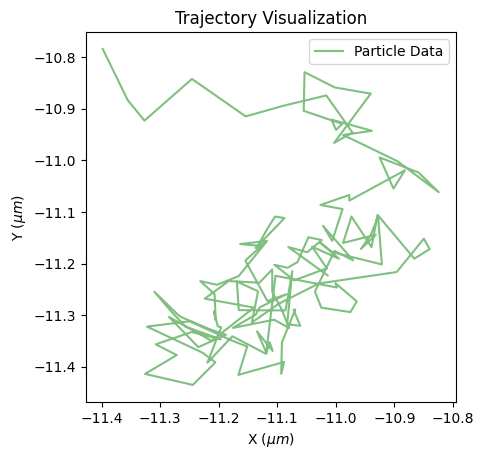

In [7]:
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#groundTruth = diffusion(fineCoordinates.T)
#shape = (nFineX, nFineY)

#unshapedMap = cInduFine.T @ (cInduInduInv @ np.mean(dVect, 0))

#shapedGroundTruth = np.reshape(groundTruth, shape)
#shapedMap = np.reshape(unshapedMap, shape)
#shapedX = np.reshape(fineCoordinates[:,0], shape)
#shapedY = np.reshape(fineCoordinates[:,1], shape)
#diff = (np.abs((shapedGroundTruth - shapedMap))/shapedGroundTruth)
fig, ax = plt.subplots(1, 1)

plt.xlabel(r"X ($\mu m$)")
plt.ylabel(r"Y ($\mu m$)")
plt.title('Trajectory Visualization')
#fig.set_zlabel('Diffusion Coefficient(UNITS)')
#induCoordinates = variables.induCoordinates 
plt.plot(trajectories[:142,0], trajectories[:142,1], color = "green", alpha = 0.5, label = "Particle Data")
#plt.scatter(induCoordinates[:,0], induCoordinates[:,1], color = "black", alpha = 0.5, label = "Inducing Points")
#plt.clabel(mapPlot, inline=2, fontsize=10)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend()